In [1]:
from libs.seq2seq_model import LinearRNNModel, LinearRNNEncDecModel, TransformerModel, LinearTransformerModel
from libs.lfgenerator import LinearRNNGroundTruth, TwoPart, LinearRNNEncDecGroundTruth
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input, output =  TwoPart({'input_dim': 1,
                                            'output_dim': 1,
                                            'data_num': 128,
                                            'path_len': 64,
                                            'centers': [6, 25, 50],
                            'sigmas':[0.5, 0.5, 0.2]}).generate()
generator =  TwoPart({'input_dim': 1,
                                            'output_dim': 1,
                                            'data_num': 128,
                                            'path_len': 64,
                                            'centers': [6, 25, 50],
                            'sigmas':[0.5, 0.5, 0.2]})
# model = LinearRNNEncDecModel.load_from_checkpoint('rnnEncDec-epoch=72-valid_loss=9.30e-04.ckpt')   
model = LinearTransformerModel.load_from_checkpoint('multiple_part-galerkin4-epoch=00-valid_loss=4.48e-05.ckpt')                          

Package not found.


In [3]:
test_input = torch.eye(64).unsqueeze(-1)
rhots = model(test_input).detach().numpy().squeeze(-1).T

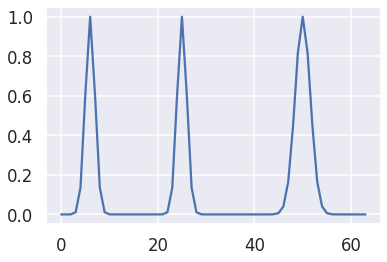

In [4]:
plt.plot([generator.rho(0,s) for s in range(64)])

In [5]:
model(test_input).shape

torch.Size([64, 64, 1])

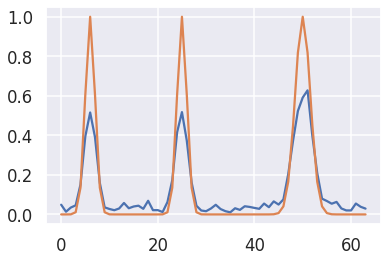

In [6]:
plt.plot(rhots[60,:])
plt.plot([generator.rho(50,s) for s in range(64)])

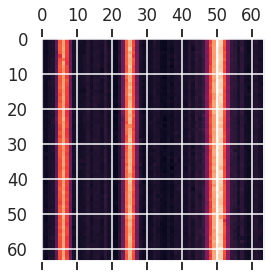

In [7]:
plt.matshow(rhots)

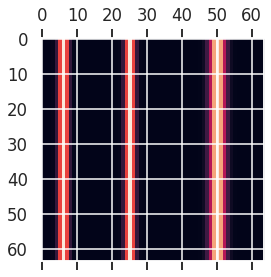

In [8]:
plt.matshow([[generator.rho(i,j) for j in range(64)] for i in range(64)])

In [9]:
input, output = TwoPart({'input_dim': 1,
                            'output_dim': 1,
                            'data_num': 128,
                            'path_len': 64 ,
                            'centers': [6, 25, 50],
                            'sigmas':[0.5, 0.5, 0.2]}).generate()

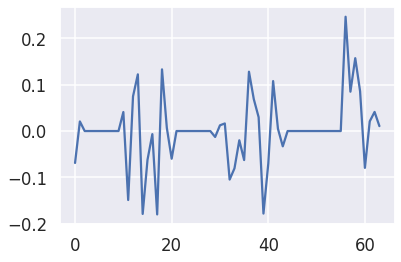

In [10]:
plt.plot(input[-1])

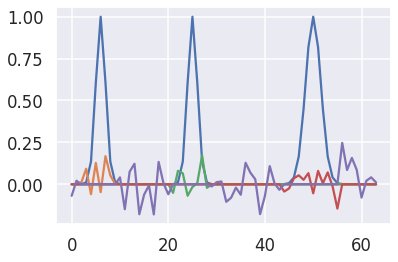

In [11]:
plt.plot([generator.rho(32,s) for s in range(64)])
plt.plot(input[127])
plt.plot(input[128])
plt.plot(input[256])
plt.plot(input[-1])

In [12]:
attn = model(torch.tensor(input, dtype=torch.float32)[0:1], return_attn=True)[1]
attn.shape

torch.Size([1, 16, 64, 64])

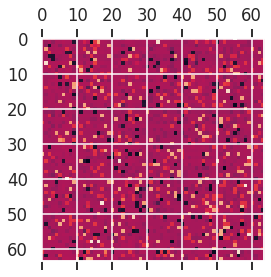

In [13]:
plt.matshow(torch.sum(attn[0], axis=0).detach().numpy())